# EXERCICIO 1

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
 
np.random.seed(10)

data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns[0:-2])
# mostra os dados
data.head(10)

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

Número de linhas e colunas na matriz de atributos: (310, 7)


In [8]:
from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)

In [9]:
model = tree.DecisionTreeClassifier(criterion = 'gini', random_state = 101)


In [10]:
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

In [12]:
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.7741935483870968


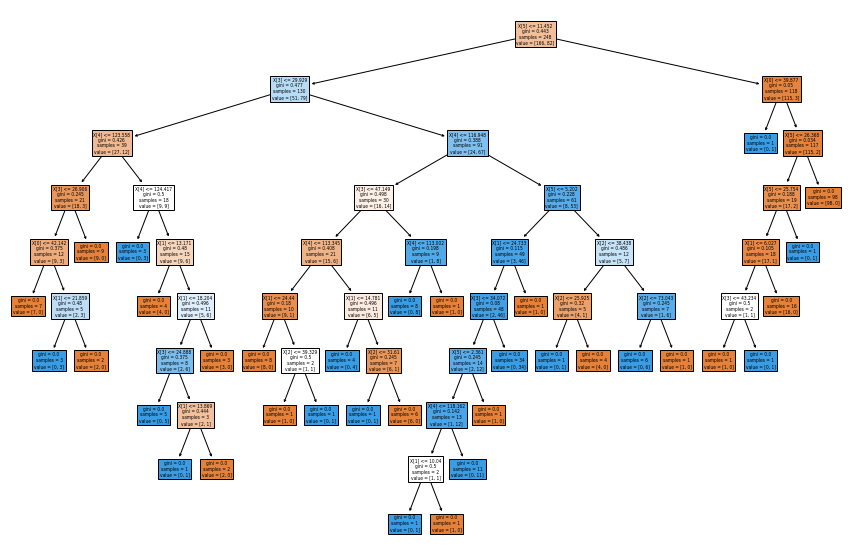

In [13]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show(True)

In [18]:
confusion_matrix(y_pred, y_test)
pd.crosstab(y_pred, y_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Abnormal,Normal,All
True,,,
Abnormal,38,8,46
Normal,6,10,16
All,44,18,62


In [21]:
print('Accuracy:', accuracy_score(y_pred, y_test))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.7741935483870968
F1 score: 0.7163398692810458
Precision: 0.7255434782608696
Recall: 0.7095959595959596

 clasification report:
               precision    recall  f1-score   support

    Abnormal       0.83      0.86      0.84        44
      Normal       0.62      0.56      0.59        18

    accuracy                           0.77        62
   macro avg       0.73      0.71      0.72        62
weighted avg       0.77      0.77      0.77        62



# EXERCICIO 2

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score

In [24]:
np.random.seed(10)
data = pd.read_csv('data/vertebralcolumn-2C.csv', header=(0))

# remove NaN
data = data.dropna(axis='rows') #
# armazena o nome das classes
classes = np.array(pd.unique(data[data.columns[-1]]), dtype=str)  #name of the clases
features_names = data.columns

print("Número de linhas e colunas na matriz de atributos:", data.shape)
attributes = list(data.columns[0:-2])
# mostra os dados
data.head(10)

data = data.to_numpy()
nrow,ncol = data.shape
y = data[:,-1]
X = data[:,0:ncol-1]

from sklearn.model_selection import train_test_split
p = 0.2 # fracao de elementos no conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = 2)


Número de linhas e colunas na matriz de atributos: (310, 7)


In [27]:
model=RandomForestClassifier(n_estimators=50, random_state = 42)


In [28]:
model.fit(x_train,y_train)
#Predict the response for test dataset
y_pred = model.predict(x_test)
score = accuracy_score(y_pred, y_test)
print('Accuracy:', score)

Accuracy: 0.8870967741935484


In [29]:
confusion_matrix(y_pred, y_test)
pd.crosstab(y_pred, y_test, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,Abnormal,Normal,All
True,,,
Abnormal,43,6,49
Normal,1,12,13
All,44,18,62


In [30]:
print('Accuracy:', accuracy_score(y_pred, y_test))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('Precision:', precision_score(y_test, y_pred, average="macro"))
print('Recall:', recall_score(y_test, y_pred, average="macro"))
print('\n clasification report:\n', classification_report(y_test, y_pred))

Accuracy: 0.8870967741935484
F1 score: 0.8494623655913978
Precision: 0.9003139717425432
Recall: 0.821969696969697

 clasification report:
               precision    recall  f1-score   support

    Abnormal       0.88      0.98      0.92        44
      Normal       0.92      0.67      0.77        18

    accuracy                           0.89        62
   macro avg       0.90      0.82      0.85        62
weighted avg       0.89      0.89      0.88        62

